Linear Regression

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print("Iris Data Frame: \n", df)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Iris Data Frame: 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149            

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 4)
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865

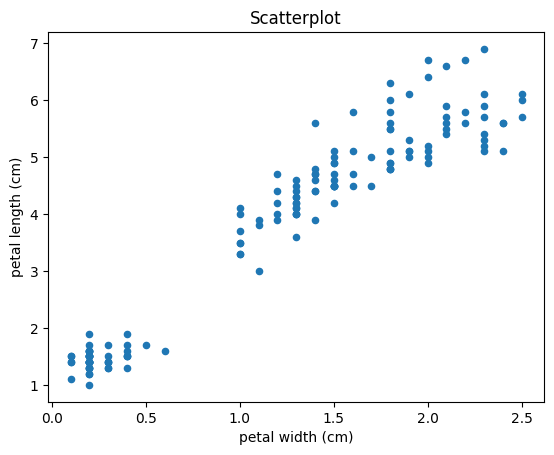

In [20]:
# EDA
print(df.head())
print(df.shape)
df.plot.scatter(x =  'petal width (cm)', y = 'petal length (cm)', title="Scatterplot")
print(df.corr())
print(df.describe())

In [23]:
# Pre-Processing
y = df['petal width (cm)'].values.reshape(-1,1)
x = df['petal length (cm)'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("x_train: \n",x_train)
print("y_train: \n",y_train)

x_train: 
 [[3.5]
 [6.3]
 [1.6]
 [4. ]
 [4.9]
 [4.2]
 [1.3]
 [1. ]
 [5.8]
 [5.1]
 [1.3]
 [4.7]
 [5.8]
 [5.2]
 [4.8]
 [5.1]
 [1.7]
 [3.9]
 [4.5]
 [5. ]
 [1.5]
 [4. ]
 [4.7]
 [5. ]
 [1.5]
 [4.1]
 [1.3]
 [5. ]
 [6.1]
 [1.7]
 [1.3]
 [5.1]
 [1.4]
 [1.5]
 [4.5]
 [1.5]
 [4.2]
 [6. ]
 [4. ]
 [5.6]
 [5.1]
 [5.9]
 [1.7]
 [4.8]
 [3.6]
 [5.1]
 [4.6]
 [6.1]
 [4. ]
 [4.5]
 [5. ]
 [4.9]
 [4.9]
 [5.6]
 [5.7]
 [5.9]
 [6.1]
 [4.2]
 [5.7]
 [1.4]
 [1.4]
 [1.6]
 [1.5]
 [1.3]
 [1.6]
 [4.3]
 [5.6]
 [1.4]
 [3.7]
 [3.9]
 [3. ]
 [4.1]
 [1.4]
 [1.5]
 [1.5]
 [4.7]
 [5.5]
 [5.7]
 [1.9]
 [4.3]
 [4.1]
 [3.3]
 [1.5]
 [4.9]
 [1.7]
 [5.4]
 [5.5]
 [4.5]
 [1.4]
 [4.6]
 [1.9]
 [4.5]
 [4.4]
 [1.1]
 [5.2]
 [6.9]
 [5.6]
 [5.3]
 [6.7]
 [5.4]
 [1.2]
 [4.5]
 [5.1]
 [5.5]
 [6.4]
 [6.6]
 [3.9]
 [4.4]
 [4.9]
 [5.3]
 [3.5]
 [4.8]
 [1.5]
 [3.3]
 [1.4]
 [4.6]
 [4.4]
 [1.5]
 [1.3]
 [1.3]]
y_train: 
 [[1. ]
 [1.8]
 [0.2]
 [1. ]
 [1.8]
 [1.3]
 [0.3]
 [0.2]
 [1.6]
 [1.8]
 [0.2]
 [1.2]
 [2.2]
 [2.3]
 [1.8]
 [1.6]
 [0.2]
 [1.1]
 [1.7]
 [2.

In [25]:
# Train Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

[-0.38288347]
[[0.42278632]]


In [34]:
# Predictions
score = regressor.predict([[7.5]])
print(score)

[[2.78801392]]


In [30]:
def calc(slope, intercept, value):
  return slope*value + intercept

In [31]:
score = calc(regressor.coef_, regressor.intercept_, 7.5)
print(score)

[[2.78801392]]


In [35]:
y_pred = regressor.predict(x_test)
df_pred = pd.DataFrame({'Actual': y_test.squeeze(), "Predicted": y_pred.squeeze()})
print(df_pred)

    Actual  Predicted
0      1.3   1.392819
1      0.3   0.251296
2      1.8   1.646491
3      1.9   1.773327
4      0.2   0.209017
5      0.6   0.293575
6      1.9   1.773327
7      1.5   1.519655
8      1.4   1.604212
9      2.4   1.984720
10     0.1   0.209017
11     2.0   2.449785
12     0.2   0.293575
13     1.8   2.153834
14     0.1   0.209017
15     1.4   1.604212
16     1.1   1.223705
17     1.2   1.477376
18     0.3   0.209017
19     0.2   0.251296
20     0.4   0.251296
21     0.2   0.209017
22     1.5   1.519655
23     1.8   1.984720
24     0.4   0.293575
25     1.3   1.308262
26     0.2   0.293575
27     0.2   0.124460
28     1.8   2.069277
29     0.3   0.209017


In [37]:
# Evaluating the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error: \n", mae)
print("Mean Squared Error: \n", mse)
print("Root Mean Squared Error: \n", rmse)

Mean Absolute Error: 
 0.14573089692578314
Mean Squared Error: 
 0.0347799792271184
Root Mean Squared Error: 
 0.1864939120376813
